# **Vegetable Image Classification**

---
**Graded Challenge 7**

**Name**    : Iznia Azyati

---

## **Model Inference**

### **1. Import Libraries**

In [18]:
# Load library
import cv2
import numpy as np
import tensorflow as tf
from IPython.display import Image, display
from google.colab import drive
import matplotlib.pyplot as plt
import glob


### **2. Load Model**

In [30]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Define the path to the dataset

# Load Modal dari gdrive
model_path = '/content/drive/My Drive/Dataset_GC7/model_func_transfer_improved.keras'


In [32]:
# Load Model
model = tf.keras.models.load_model(model_path, compile=False)


### **3. Feature Engineering**


Sebelum membuat prediksi, gambar perlu pre-processed terlebih dahulu menggunakan langkah-langkah yang sama seperti yang dijelaskan di main notebook.

- Muat Model yang Disimpan
- Preprocess Data Input
- Lakukan Prediksi
- Tampilkan atau Proses Hasil Prediksi

In [33]:
# Define kategori
class_names = ['Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Pumpkin']

In [34]:
# Function to preprocess the input image

# Fungsi untuk preprocess gambar
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))     # Ubah ukuran gambar agar sesuai dengan input model
    img = img / 255.0                     # Normalisasi nilai piksel ke [0, 1]
    img = np.expand_dims(img, axis=0)     # Tambahkan dimensi batch
    return img

In [35]:
# Fungsi untuk melakukan inferensi pada gambar tunggal
def predict_single_image(image_path):
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    return prediction


In [36]:
# Fungsi untuk menampilkan gambar
def display_image(image_path):
    display(Image(filename=image_path))


### **4. Predicting**


In [37]:
# Fungsi untuk mendapatkan label kelas yang diprediksi
def get_predicted_class(prediction):
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    return predicted_class

In [38]:
# Definisikan paths gambar yang akan diuji
image_paths = ['gambar_1150.jpg',
               'gambar_1161.jpg',
               'gambar_1166.jpg',
               'gambar_1361.jpg',
               'gambar_1383.jpg',
               'gambar_1385.jpg',
               'gambar_1457.jpg']


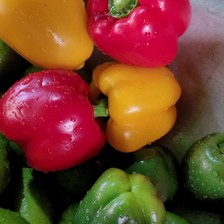

1/1 [==============================] - 3s 3s/step
Prediction: [[6.2052010e-08 9.9999821e-01 2.4546619e-08 7.1637498e-07 8.9660364e-07]]
Predicted class: Capsicum


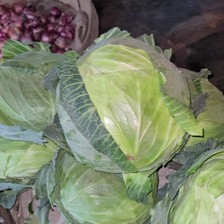

1/1 [==============================] - 0s 18ms/step
Prediction: [[9.996381e-01 8.959598e-06 8.587886e-06 5.088419e-05 2.935114e-04]]
Predicted class: Cabbage


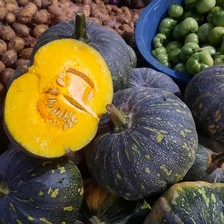

1/1 [==============================] - 0s 18ms/step
Prediction: [[7.569854e-04 2.546158e-04 8.936133e-05 1.997784e-04 9.986992e-01]]
Predicted class: Pumpkin


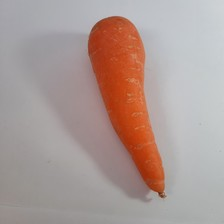

1/1 [==============================] - 0s 18ms/step
Prediction: [[5.6448748e-04 9.6086680e-04 9.9833530e-01 9.8481927e-05 4.0856958e-05]]
Predicted class: Carrot


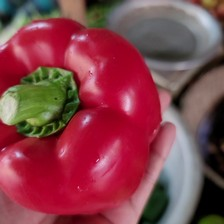

1/1 [==============================] - 0s 17ms/step
Prediction: [[2.5420659e-05 9.9923360e-01 5.7554778e-05 1.5570557e-04 5.2779634e-04]]
Predicted class: Capsicum


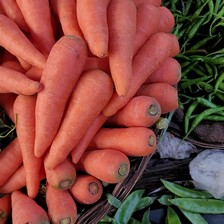

1/1 [==============================] - 0s 17ms/step
Prediction: [[4.2937617e-03 2.6520831e-04 9.9476469e-01 4.6132933e-04 2.1502351e-04]]
Predicted class: Carrot


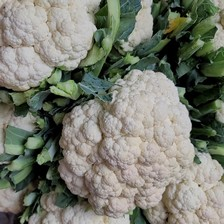

1/1 [==============================] - 0s 18ms/step
Prediction: [[6.7983888e-07 5.7625108e-08 4.9879227e-06 9.9999261e-01 1.6400116e-06]]
Predicted class: Cauliflower


In [39]:
# Inference pada gambar yang diunduh

for image_path in image_paths:
    display_image(image_path)
    prediction = predict_single_image(image_path)
    print("Prediction:", prediction)
    predicted_class = get_predicted_class(prediction)
    print("Predicted class:", predicted_class)

#### **Predict per Image**


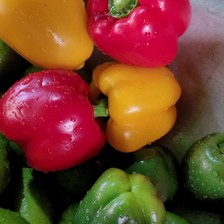

In [40]:
# Prediction1

image_path = '/content/gambar_1150.jpg'
display_image(image_path)

In [41]:
image_path = '/content/gambar_1150.jpg'
prediction1 = predict_single_image(image_path)
print("Prediction:", prediction1)


1/1 [==============================] - 0s 29ms/step
Prediction: [[6.2052010e-08 9.9999821e-01 2.4546619e-08 7.1637498e-07 8.9660364e-07]]


In [42]:
predicted_class = get_predicted_class(prediction1)
print("Predicted class:", predicted_class)

Predicted class: Capsicum


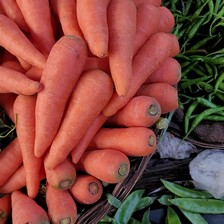

In [46]:
# Prediction2

image_path2 = '/content/gambar_1385.jpg'
display_image(image_path2)

In [47]:
image_path2 = '/content/gambar_1385.jpg'
prediction2 = predict_single_image(image_path2)
print("Prediction_2:", prediction2)


1/1 [==============================] - 0s 18ms/step
Prediction_2: [[4.2937617e-03 2.6520831e-04 9.9476469e-01 4.6132933e-04 2.1502351e-04]]


In [48]:
predicted_class = get_predicted_class(prediction2)
print("Predicted class:", predicted_class)

Predicted class: Carrot


### **5. Conclusion**


Model yang telah dilatih menunjukkan kemampuan yang baik dalam mengklasifikasikan gambar-gambar baru yang tidak pernah dilihat sebelumnya. Model mampu mengenali karakteristik visual dari sayuran dengan akurasi yang tinggi, sebagaimana dibuktikan oleh prediksi yang benar terhadap gambar-gambar **Capsicum** dan **Carrot**. Proses preprocessing gambar, termasuk `resize` dan `normalisasi`, memastikan bahwa gambar yang diuji sesuai dengan input yang diharapkan oleh model, sehingga meningkatkan keakuratan prediksi.